In [1]:
# import nltk
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# import os
import seaborn as sns


In [4]:
airports = pd.read_csv('../fpc/airports.csv', sep=',')
display(airports.shape)
display(airports)



(322, 7)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [5]:
airlines = pd.read_csv('../fpc/airlines.csv')
display(airlines.shape)
display(airlines)

(14, 2)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
flights_test = pd.read_csv('../fpc/flights_test.csv')
display(flights_test.shape)
display(flights_test)

(514384, 17)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523


In [7]:
flights_train = pd.read_csv('../fpc/flights_train.csv')
display(flights_train.shape)
display(flights_train)

(2818553, 18)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [8]:
submit_sample = pd.read_csv('../fpc/submit_sample.csv')
display(submit_sample.shape)
display(submit_sample)

(514384, 2)

,id,ARRIVAL_DELAY
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
514379,514379,0.0
514380,514380,0.0
514381,514381,0.0
514382,514382,0.0


In [9]:
# display number of null values for each column if exist 
def values_null(df_data):
    if df_data.isnull().values.any():
        display(df_data.isnull().sum())
    else:
        display("Null values")

# convert year, month, day to date
def retrieve_date(values):
    return datetime.datetime(year=values['YEAR'], month=values['MONTH'], day=values['DAY'])

def delayed_or_not(row):
    delays = 0
    on_time = 0
    if row['ARRIVAL_DELAY'] != 0:
        return 1
    else:
        return 0


In [10]:
flights_train['date'] = flights_train.apply(retrieve_date,axis=1)
flights_train['date'] = pd.to_datetime(flights_train['date'])


In [11]:
cleaned = flights_train.drop(['id', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)
# cleand_date = cleaned.day_name('date', axis=1)
cleaned['Day'] = cleaned['date'].dt.day_name()
display(cleaned)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day
0,AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday
1,AA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday
2,US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday
3,AA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday
4,AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,UA,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday
2818549,UA,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday
2818550,UA,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday
2818551,UA,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday


In [12]:
# airport = pd.merge(airports,airport.groupby('state')['iata'].count().reset_index().rename(columns={'iata':'no_airports'}),how='inner',on='state')
# airports['Count'] = airports.groupby(['STATE'])
# display(airports.groupby(['STATE']))
display(airports)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


<AxesSubplot:title={'center':'# Airports per state'}, xlabel='STATE'>

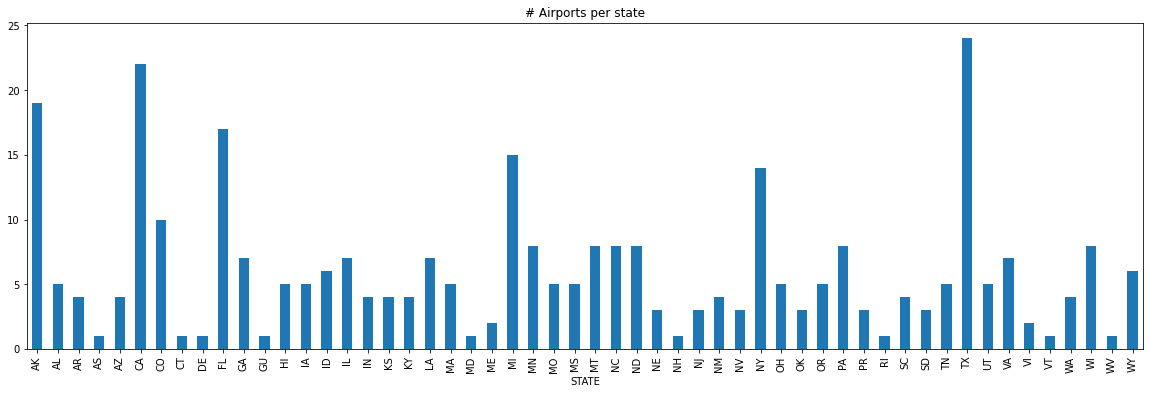

In [13]:
plt.figure(figsize=(20,6))
airports.groupby('STATE')['STATE'].count().plot.bar(title='# Airports per state')

In [14]:
values_null(airports)

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [15]:
# aiports_cleaned = airports.dropna(axis=1, inplace=True)
display(aiports_cleaned)

NameError: name 'aiports_cleaned' is not defined

<AxesSubplot:title={'center':'% airlines in total'}>

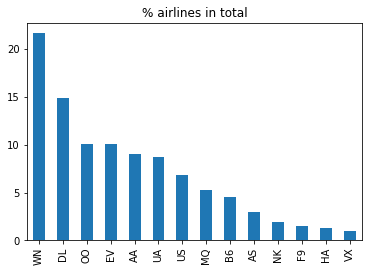

In [16]:
(flights_train['AIRLINE'].value_counts(normalize=True)*100).plot.bar(title='% airlines in total')


<AxesSubplot:title={'center':'# Airports per state'}, xlabel='Day'>

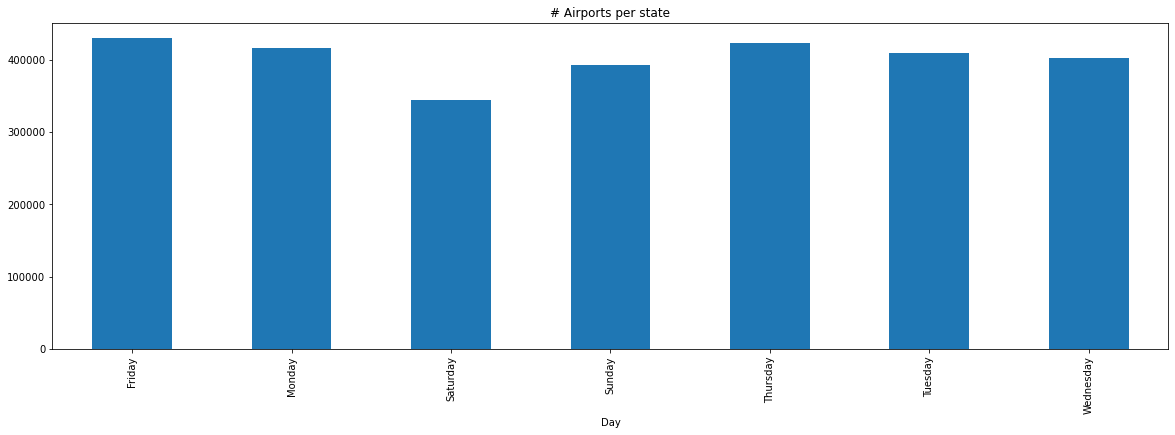

In [24]:
plt.figure(figsize=(20,6))
cleaned.groupby('Day')['Day'].count().plot.bar(title='# Airports per state')

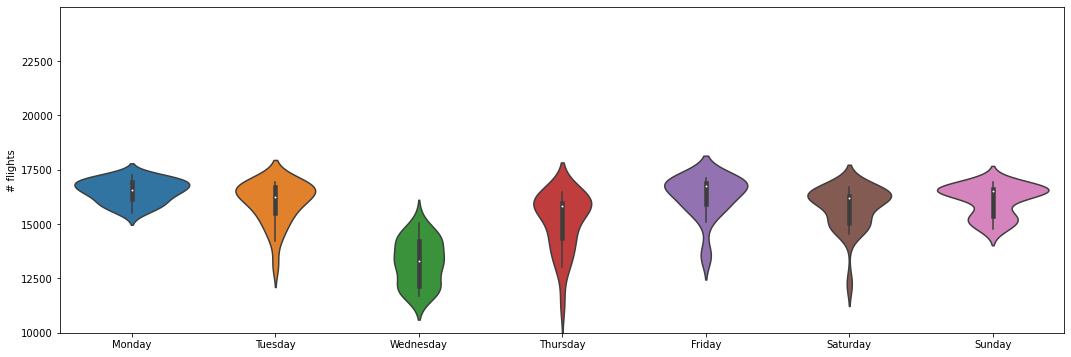

In [31]:
fig, ax = plt.subplots(figsize=(18,6))
weekly = cleaned.groupby('date')['Day'].value_counts().unstack()
_ = sns.violinplot(data=weekly, ax=ax)
_ = ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = ax.set_xlabel('')
_ = ax.set_ylabel('# flights')
_ = ax.set_ylim([10000, 25000])
_ = ax.set_yticks(np.arange(10000, 25000, 2500))
# Del temp vars
del fig, ax, weekly

In [32]:
# display(cleaned)
plt.figure(figsize=(20,6))
cleaned.groupby('Day')['Day'].count().plot.bar(title='# Airports per state')

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day
0,AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday
1,AA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday
2,US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday
3,AA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday
4,AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,UA,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday
2818549,UA,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday
2818550,UA,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday
2818551,UA,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday


In [ ]:
# display(cleaned)
plt.figure(figsize=(20,6))
cleaned.groupby('Day')['Day'].count().plot.bar(title='# Airports per state')